<a href="https://colab.research.google.com/github/ChetanJadhav2341/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our
lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences),
recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some
industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to
create a book recommendation system for users

**Content**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books


ooks are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (BookTitle, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.



# **Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
url_books='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Books.csv'
url_ratings='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Ratings.csv'
url_users='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Users.csv'

In [4]:
df_books=pd.read_csv(url_books)
df_ratings=pd.read_csv(url_ratings)
df_users=pd.read_csv(url_users)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Importing Libraries**

In [5]:

#Importing Libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

**1. Checking Books Data**

In [6]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [8]:
df_books.shape

(271360, 8)

In [9]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
df_books.Publisher.fillna('other',inplace=True)

In [11]:
df_books.loc[df_books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [12]:
df_books['Book-Author'].fillna('other',inplace=True)

In [13]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
df_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication       202
Publisher               16808
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [15]:
df_books.duplicated().sum()

0

In [16]:
df_books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [17]:
# There are no need some columns which will Drop it.
df_books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [18]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [19]:
df_books['Book-Title'].nunique()

242135

In [20]:

df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('str')
a=list(df_books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)


['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [21]:
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In above some miss-match entries have been incorrectly loaded which will rearrenge

In [22]:
df_books.loc[df_books.ISBN == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953','Book-Author'] = "James Buckley"
df_books.loc[df_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


In [23]:
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [24]:
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [25]:

df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


In [26]:
df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('str')
a=list(df_books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050']


In Above data all values in integere

**2. Checking Ratings Dataset**

In [27]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [28]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [29]:
df_ratings.shape

(1149780, 3)

In [30]:
df_ratings.duplicated().sum()

0

In [31]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [32]:
df_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [33]:
df_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

Ratings dataset should have books only which exist in our books dataset

In [34]:
df_ratings_new = df_ratings[df_ratings.ISBN.isin(df_books.ISBN)]
df_ratings.shape,df_ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having df_book ISBN not part of df_books dataset got dropped off
df_ratings dataset should have df_ratings from df_users which exist in df_users dataset.

In [35]:
df_ratings_new = df_ratings_new[df_ratings_new['User-ID'].isin(df_users['User-ID'])]

It can be seen that no new user was there in ratings dataset.


Let's see how the ratings are distributed

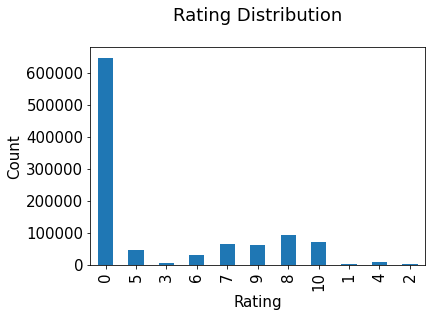

In [64]:
plt.rc("font", size=15)
df_ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [36]:

#Hence segragating implicit and explict ratings datasets
df_ratings_explicit = df_ratings_new[df_ratings_new['Book-Rating'] != 0]
df_ratings_implicit = df_ratings_new[df_ratings_new['Book-Rating'] == 0]


In [37]:
df_rating_count = pd.DataFrame(df_ratings_explicit.groupby('ISBN')['Book-Rating'].count())
df_rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.


In [38]:

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, df_books, on='ISBN')
most_rated_books_summary


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received
the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [39]:

# Create column Rating average 
df_ratings_explicit['Avg_Rating']=df_ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
df_ratings_explicit['Total_No_Of_Users_Rated']=df_ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')


In [40]:
df_ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


**3. Checking Users Dataset**

In [41]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [42]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [43]:
#percentage of missing values
round(df_users.isnull().mean().mul(100),2)


User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In the users dataset there are 110762 missing values found in the Age column which is 39.72% of the total value.

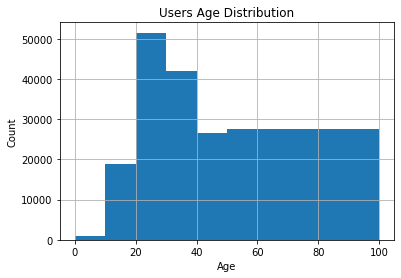

In [44]:

# histogram plot for users age distribution
df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Users Age Distribution')
plt.show()

he most active book readers are in the age group of 20-33.

Text(0.5, 1.0, 'Outlier data in Age column')

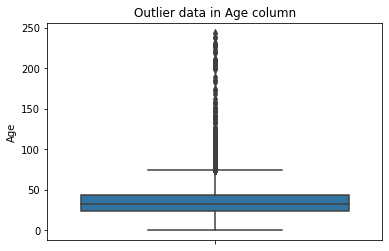

In [45]:

# checking outliers through boxplot
sns.boxplot(y='Age', data=df_users)
plt.title('Outlier data in Age column')

From the above boxplot we can observe that outliers are present in the Age column in the "Users" dataset.

In [46]:

# Checking the unique value of users age
print(sorted(df_users.Age.unique()))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [47]:
 # unique value in Location columns
 df_users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [48]:
#Creating column Country

for i in df_users:
 df_users['Country']=df_users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
print(df_users.Country.nunique())


529


In [49]:
#drop location column
df_users.drop('Location',axis=1,inplace=True)

In [50]:
df_users.sample(5)

,User-ID,Age,Country
47518,47519,31.0,spain
269237,269238,50.0,usa
211061,211062,NaN,usa
86773,86774,NaN,germany
252161,252162,NaN,norway


In [51]:

#checking for missing values
df_users.isnull().sum()


User-ID         0
Age        110762
Country       368
dtype: int64

In [52]:
#changing datatype
df_users['Country']=df_users['Country'].astype('str')

In [53]:

a=list(df_users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings Let's correct it.

In [54]:
df_users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

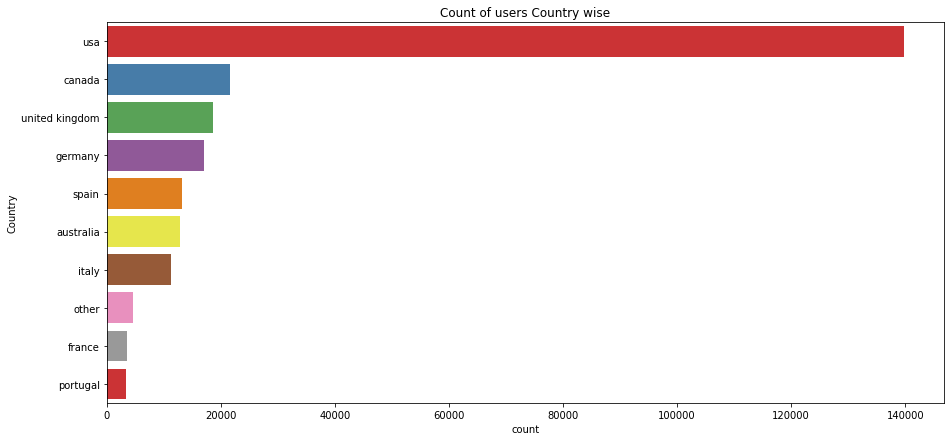

In [55]:

plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=df_users,order=pd.value_counts(df_users['Country']).iloc[:10].index, palette='Set1')
plt.title('Count of users Country wise')

Most number of users are from USA
Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

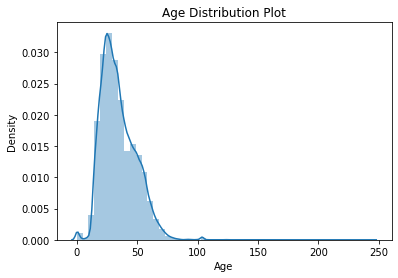

In [56]:

sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaN.

In [57]:

# outlier data became NaN
df_users.loc[(df_users.Age > 100) | (df_users.Age < 5), 'Age'] = np.nan

In [59]:

df_users.isna().sum()


User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use
country column to fill Nan.

In [60]:
df_users['Age'] = df_users['Age'].fillna(df_users.groupby('Country')['Age'].transform('median'))


In [61]:
df_users.isna().sum()


User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean


In [62]:
df_users['Age'].fillna(df_users.Age.mean(),inplace=True)

In [63]:
df_users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

# **Merging All Dataset.**